# Classification model to predict bank customer churn

### About the dataset:

The dataset is from the Kaggle website (https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset) and contains the customer data of account holders at ABC Multinational Bank. The classification goal is to predict the loss of customer account holders for any reason.

It includes over 10,000 records and 12 attributes.


### Objective: To build a classification model that predicts churn for an account holder. (note the target column to predict is 'churn') 

### We are going to perform the following steps: 

1. Import Libraries
2. Read in Dataset
3. Data Inspect and Cleaning
4. Exploratory Data Analysis
5. Feature Splitting and Scaling
6. Predictive Modeling (Logistic Regression)


# Importing Libraries

In [13]:
#!python3 -m pip install pandas numpy matplotlib seaborn scikit-learn

# Data Loading and Numerical Operations
import pandas as pd
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Read in Dataset

In [14]:
data = pd.read_csv("Bank_Customer_Churn_Prediction.csv") # Reading and converting the data into a pandas dataframe
data.shape # Calculating the dimensions of the dataset

(10000, 12)

In [15]:
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Above is an overview of the columns/features. 

Including feature non-null count and the data types of the dataset.

Note that there are two categorical features, 'country' and 'gender'.

### Attributes:

* **customer_id**: customer identifier (unused variable)
* **credit_score**: customer's credit score (Continuous)
* **country**: "Spain", "France" or "Germany" (Categorical)
* **gender**: "Male" or "Female" (Categorical)
* **age**: customer's age (Continuous)
* **tenure**: years individual has been bank's customer (Continuous)
* **balance**: customer's bank balance (Continuous)
* **products_number**: number of bank services customer uses (Continuous)
* **credit_card**: if customer has credit card or not (binary: “1” means “Yes”, “0” means “No”)
* **active_member**: if customer is active member of bank (binary: “1” means “Yes”, “0” means “No”)
* **estimated_salary**: customer's estimated salary (Continuous)
* **churn**: (binary: “1” means “Yes”, “0” means “No”) - Target Variable


# Data Inspecting and Cleaning 

In [17]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Above confirms that there are no missing values, null values or np.nan present in the dataset.

In [18]:
data.duplicated().sum()

np.int64(0)

Above shows that there are no duplicated values present in the dataset.

In [19]:
data['country'] = data['country'].replace({"France": 1, "Spain": 2, "Germany": 3})
data['gender'] = data['gender'].replace({ "Male": 0, "Female": 1})

data.drop('customer_id', axis=1, inplace=True)

/var/folders/9n/1nl68bn16mqd0pkljvxf51qr0000gn/T/ipykernel_159/1449069192.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['country'] = data['country'].replace({"France": 1, "Spain": 2, "Germany": 3})
/var/folders/9n/1nl68bn16mqd0pkljvxf51qr0000gn/T/ipykernel_159/1449069192.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({ "Male": 0, "Female": 1})


Above the categorical features ('gender' and 'country') are replaced with numerical values.

Additionally the 'customer_id' column is removed.

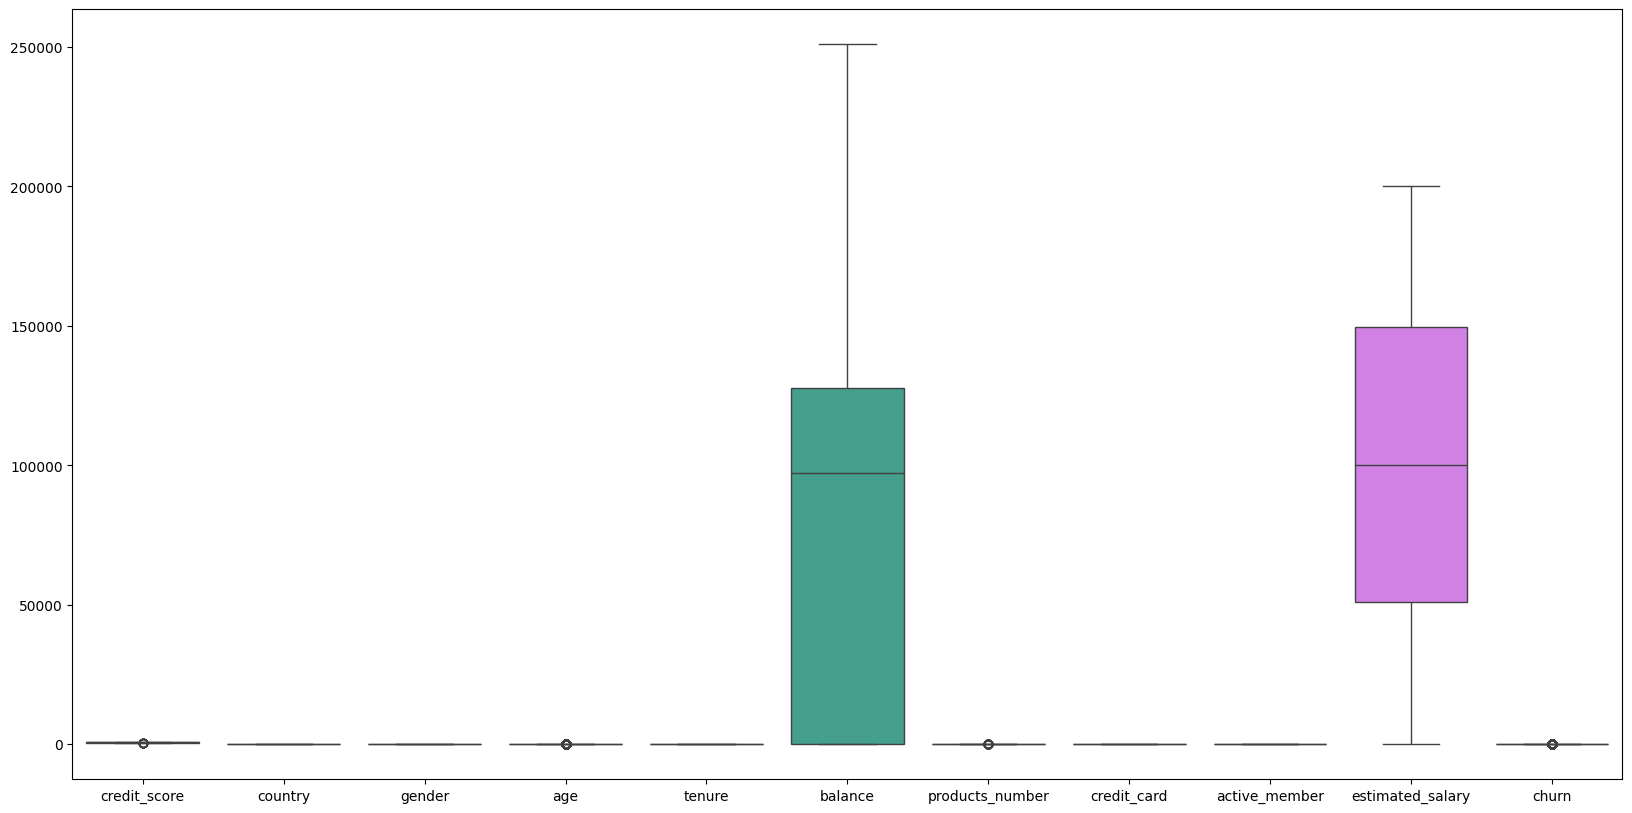

In [20]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

No Outliers are detected in the dataset.

With missing values, outliers and duplicate values out of the way,
the dataset is now ready for EDA.

# Exploratory Data Analysis

In [21]:
data.describe()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,1.749500,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,3.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,3.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Above, the overall statistical information is displayed
* mean, standard deviation and other statistical metrices
* the categorical data (converted into discrete numerical values)

# Feature Splitting and Scaling

In [22]:
y = data['churn']
X = data.drop(['churn'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

We divide the dataset into training and test sub-datasets for predictive modeling

In [23]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Predictive Modeling

Logistic Regression

In [24]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confusion matrix
[[3078   81]
 [ 673  168]]


Accuracy of Logistic Regression: 81.15 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3159
           1       0.67      0.20      0.31       841

    accuracy                           0.81      4000
   macro avg       0.75      0.59      0.60      4000
weighted avg       0.79      0.81      0.77      4000

